In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline


In [2]:
df = pd.read_csv("WATER_BALANCEs.csv")

In [3]:
df.head()

,Uphc,DMA,MHH Cons,MNHH Cons,Months,Years,Distribution Input,Mean Air Temperature,Annual sunshine,Maximum Temperature,Annual Precipitation,minimum air temperature
0,449.06,254.494370,487.418731,303.765028,April,2025-26 Forecast,1965.088137,10.3,246.3,16.2,19.8,4.4
1,446.16,280.573536,463.915946,309.580585,April,2024-25,1917.167916,9.2,124.2,13.1,79.9,5.2
2,442.70,303.842818,454.271370,310.717906,April,2023-24,1921.630700,8.3,153.0,12.6,64.1,4.0
3,419.03,323.969543,451.867754,306.920292,April,2022-23,1945.592948,8.8,177.8,13.8,23.9,3.8
4,390.97,309.665434,470.471620,288.840000,April,2021-22,2007.276103,6.1,220.3,11.6,13.5,0.6


In [4]:
df.shape

(108, 12)

In [5]:
df.describe()


,Uphc,DMA,MHH Cons,MNHH Cons,Distribution Input,Mean Air Temperature,Annual sunshine,Maximum Temperature,Annual Precipitation,minimum air temperature
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,420.189010,342.151049,433.060933,314.108199,1963.471607,10.621782,132.045545,14.688119,69.922772,6.555446
std,27.079284,42.762862,40.235965,20.664990,59.222815,4.636175,65.160501,5.409368,36.223199,3.976342
min,361.630000,254.494370,357.840000,241.970000,1890.512006,2.500000,25.300000,5.400000,6.700000,-0.500000
25%,402.940000,307.459344,396.973000,305.780555,1922.401971,6.500000,76.200000,9.900000,41.200000,3.400000
50%,420.840000,348.974560,451.850000,313.628818,1948.572860,10.200000,130.700000,14.400000,64.500000,6.000000
75%,440.700000,372.789358,462.318517,329.340000,1983.834534,15.000000,176.700000,19.700000,87.600000,10.400000
max,481.520000,456.641292,504.229671,349.987974,2202.425685,19.000000,293.500000,25.400000,162.000000,13.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Uphc                     101 non-null    float64
 1   DMA                      101 non-null    float64
 2   MHH Cons                 101 non-null    float64
 3   MNHH Cons                101 non-null    float64
 4   Months                   101 non-null    object 
 5   Years                    101 non-null    object 
 6   Distribution Input       101 non-null    float64
 7   Mean Air Temperature     101 non-null    float64
 8   Annual sunshine          101 non-null    float64
 9   Maximum Temperature      101 non-null    float64
 10  Annual Precipitation     101 non-null    float64
 11  minimum air temperature  101 non-null    float64
dtypes: float64(10), object(2)
memory usage: 10.3+ KB


In [7]:
# 2. CLEAN COLUMN NAMES (optional but recommended)
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('[()]', '', regex=True)
)

print(df.columns)


Index(['uphc', 'dma', 'mhh_cons', 'mnhh_cons', 'months', 'years',
       'distribution_input', 'mean_air_temperature', 'annual_sunshine',
       'maximum_temperature', 'annual_precipitation',
       'minimum_air_temperature'],
      dtype='object')


In [8]:
# Quick missing value check
print(df.isna().sum())

uphc                       7
dma                        7
mhh_cons                   7
mnhh_cons                  7
months                     7
years                      7
distribution_input         7
mean_air_temperature       7
annual_sunshine            7
maximum_temperature        7
annual_precipitation       7
minimum_air_temperature    7
dtype: int64


In [9]:
# Drop all rows with any missing values
df = df.dropna()

# Check the new shape after dropping NaNs
print("New shape after dropna:", df.shape)


New shape after dropna: (101, 12)


In [10]:
# Strip text after first 4 digit year
df['years'] = df['years'].astype(str).str.extract(r'(\d{4})')


In [11]:
df.head()

,uphc,dma,mhh_cons,mnhh_cons,months,years,distribution_input,mean_air_temperature,annual_sunshine,maximum_temperature,annual_precipitation,minimum_air_temperature
0,449.06,254.494370,487.418731,303.765028,April,2025,1965.088137,10.3,246.3,16.2,19.8,4.4
1,446.16,280.573536,463.915946,309.580585,April,2024,1917.167916,9.2,124.2,13.1,79.9,5.2
2,442.70,303.842818,454.271370,310.717906,April,2023,1921.630700,8.3,153.0,12.6,64.1,4.0
3,419.03,323.969543,451.867754,306.920292,April,2022,1945.592948,8.8,177.8,13.8,23.9,3.8
4,390.97,309.665434,470.471620,288.840000,April,2021,2007.276103,6.1,220.3,11.6,13.5,0.6


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 107
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uphc                     101 non-null    float64
 1   dma                      101 non-null    float64
 2   mhh_cons                 101 non-null    float64
 3   mnhh_cons                101 non-null    float64
 4   months                   101 non-null    object 
 5   years                    101 non-null    object 
 6   distribution_input       101 non-null    float64
 7   mean_air_temperature     101 non-null    float64
 8   annual_sunshine          101 non-null    float64
 9   maximum_temperature      101 non-null    float64
 10  annual_precipitation     101 non-null    float64
 11  minimum_air_temperature  101 non-null    float64
dtypes: float64(10), object(2)
memory usage: 10.3+ KB


In [13]:
df['years'] = df['years'].astype(str).str.extract(r'(\d{4})')
df['years'] = df['years'].astype(int)


In [14]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 107
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uphc                     101 non-null    float64
 1   dma                      101 non-null    float64
 2   mhh_cons                 101 non-null    float64
 3   mnhh_cons                101 non-null    float64
 4   months                   101 non-null    object 
 5   years                    101 non-null    int64  
 6   distribution_input       101 non-null    float64
 7   mean_air_temperature     101 non-null    float64
 8   annual_sunshine          101 non-null    float64
 9   maximum_temperature      101 non-null    float64
 10  annual_precipitation     101 non-null    float64
 11  minimum_air_temperature  101 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 10.3+ KB


In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
target_col = 'distribution_input'

feature_cols = [
    'uphc',
    'dma',
    'mhh_cons',
    'mnhh_cons',
    'mean_air_temperature',
    'annual_sunshine',
    'maximum_temperature',
    'annual_precipitation',
    'minimum_air_temperature',
    'years',
    'months'
]

X = df[feature_cols].copy()
y = df[target_col].copy()


In [17]:
numeric_features = [
    'uphc',
    'dma',
    'mhh_cons',
    'mnhh_cons',
    'mean_air_temperature',
    'annual_sunshine',
    'maximum_temperature',
    'annual_precipitation',
    'minimum_air_temperature',
    'years'
]

categorical_features = ['months']


In [18]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [20]:
linreg_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LinearRegression())
])


In [21]:
linreg_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['uphc', 'dma', 'mhh_cons',
                                                   'mnhh_cons',
                                                   'mean_air_temperature',
                                                   'annual_sunshine',
                                                   'maximum_temperature',
                                                   'annual_precipitation',
                                                   'minimum_air_temperature',
                                                   'years']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['months'])])),
                ('model', LinearRegression())])

In [22]:
y_pred_lr = linreg_pipe.predict(X_test)

print("Linear Regression")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))


Linear Regression
R²: 0.7922421291263527
MAE: 24.195574231750253


In [24]:
new_datas = pd.DataFrame([{
    'uphc': 430,
    'dma': 280,
    'mhh_cons': 480,
    'mnhh_cons': 320,
    'mean_air_temperature': 9.5,
    'annual_sunshine': 210,
    'maximum_temperature': 17.0,
    'annual_precipitation': 50.0,
    'minimum_air_temperature': 3.0,
    'years': 2026,
    'months': 'April'
}])

pred_dist_input = linreg_pipe.predict(new_datas)
print("Predicted distribution_input:", pred_dist_input[0])

Predicted distribution_input: 1928.6821388023745


In [25]:
comparison_lr = pd.DataFrame({
    'Actual_distribution_input': y_test.values,
    'Predicted_distribution_input': y_pred_lr
})


In [26]:
comparison_lr.head(20)


,Actual_distribution_input,Predicted_distribution_input
0,1950.764294,1917.800285
1,1897.285276,1942.311081
2,1928.784888,1891.621515
3,1922.401971,1929.218521
4,1891.366903,1859.640777
5,2035.029947,2020.600031
6,2072.318802,2076.244688
7,1959.287767,1943.750491
8,1944.769930,1940.789358
9,1965.088137,1978.915217


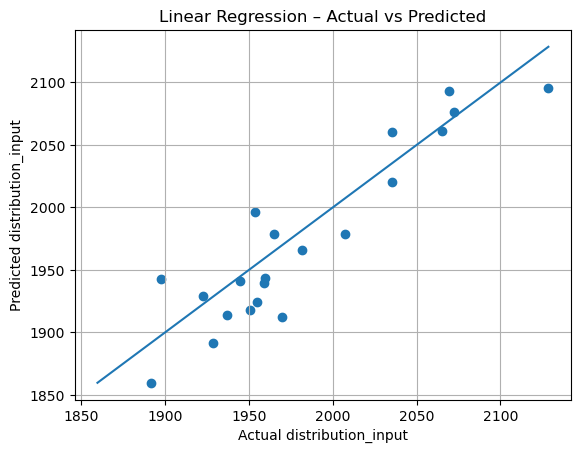

In [27]:
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual distribution_input")
plt.ylabel("Predicted distribution_input")
plt.title("Linear Regression – Actual vs Predicted")
min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.grid(True)
plt.show()
